In [1]:
import tensorflow as tf


In [2]:
tf.__version__

'2.3.0'

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pwd


'/content'

In [5]:
cd /content/drive/My Drive/traffic signal

/content/drive/My Drive/traffic signal


In [6]:
!pip install wget

In [7]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [8]:
import wget

In [9]:
wget.download(link)

'traffic-signs-data (11).zip'

In [10]:
data = "./"

In [11]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [12]:
train_link = "/content/drive/My Drive/traffic signal/train.p"
valid_link = "/content/drive/My Drive/traffic signal/valid.p"
test_link = "/content/drive/My Drive/traffic signal/test.p"

In [13]:
import pickle

In [14]:
with open(train_link,mode="rb") as f:
  train = pickle.load(f)
with open(valid_link,mode="rb") as f:
  valid = pickle.load(f)
with open(test_link,mode="rb") as f:
  test = pickle.load(f)

In [15]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [16]:
train_data_x = train["features"]
train_data_y = train["labels"]

In [17]:
train_data_x.shape

(34799, 32, 32, 3)

In [18]:
train_data_y.shape

(34799,)

In [19]:
import matplotlib.pyplot as plt


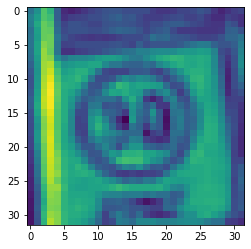

In [20]:
plt.imshow(train_data_x[3487,:,:,0])

In [21]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [22]:
train_data_y[3487]

1

In [23]:
classNames[train_data_y[3487]]

'Speed limit (30km/h)'

In [24]:
from sklearn.utils import shuffle

In [25]:
train_data_x, train_data_y = shuffle(train_data_x,train_data_y)

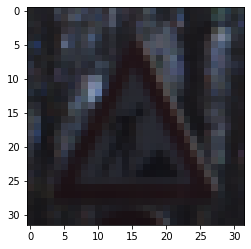

In [26]:
plt.imshow(train_data_x[3487])

In [27]:
classNames[train_data_y[3487]]

'Road work'

In [28]:
valid_data_x = valid['features']
valid_data_y = valid['labels']

In [29]:
valid_data_x.shape

(4410, 32, 32, 3)

In [30]:
valid_data_y.shape

(4410,)

In [31]:
test_data_x = test['features']
test_data_y = test['labels']

In [32]:
type(train_data_x)

numpy.ndarray

**Scale data ve [0,1]**


In [33]:
train_data_x = train_data_x.astype("float")/255
valid_data_x = valid_data_x.astype("float")/255
test_data_x = test_data_x.astype("float")/255

In [34]:
from sklearn.preprocessing import LabelBinarizer

In [35]:
from keras.utils import to_categorical

In [36]:
train_data_y = to_categorical(train_data_y)
valid_data_y = to_categorical(valid_data_y)

In [37]:
train_data_y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
train_data_y[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
from keras import layers
from keras import models

In [40]:
from keras.layers import BatchNormalization

In [41]:
model = models.Sequential()

In [42]:
width = 32
height = 32
classes = 43

In [43]:
shape = (width,height,3)

In [44]:
model.add(layers.Conv2D(32,(3,3), padding="same",input_shape = shape,activation="relu",))

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.add(BatchNormalization())

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
Total params: 1,024
Trainable params: 960
Non-trainable params: 64
_________________________________________________________________


In [48]:
model.add(layers.Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())

In [49]:
model.add(layers.MaxPool2D(2,2))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
Total params: 10,400
Trainable params: 10,272
Non-trainable params: 128
_________________________________________________________________


In [51]:
model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(layers.MaxPool2D())

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [53]:
model.add(layers.Flatten())

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [55]:
model.add(layers.Dense(512,activation="relu"))
model.add(layers.BatchNormalization())

In [56]:
model.add(layers.Dense(classes,activation="softmax"))

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [58]:
from keras.preprocessing.image import ImageDataGenerator 

In [59]:
aug = ImageDataGenerator(rotation_range=0.17,zoom_range=0.15,shear_range=0.14,height_shift_range=0.2,width_shift_range=0.2,horizontal_flip=True,vertical_flip=True)

In [60]:
learning_rate = 0.01
epochs = 10

In [61]:
model.compile(optimizer="SGD",loss="categorical_crossentropy",metrics='acc')

In [62]:
H = model.fit_generator(aug.flow(train_data_x,train_data_y,batch_size=64),train_data_x.shape[0]/64,
                        validation_data=(valid_data_x,valid_data_y),epochs = epochs,verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
544/543 [==============================] - 17s 32ms/step - loss: 2.6103 - acc: 0.2952 - val_loss: 2.8169 - val_acc: 0.2283
Epoch 2/10
544/543 [==============================] - 17s 32ms/step - loss: 1.7095 - acc: 0.4847 - val_loss: 2.1500 - val_acc: 0.4288
Epoch 3/10
544/543 [==============================] - 17s 32ms/step - loss: 1.3246 - acc: 0.5810 - val_loss: 1.7857 - val_acc: 0.4599
Epoch 4/10
544/543 [==============================] - 17s 32ms/step - loss: 1.1005 - acc: 0.6489 - val_loss: 1.7490 - val_acc: 0.4984
Epoch 5/10
544/543 [==============================] - 17s 32ms/step - loss: 0.9386 - acc: 0.6975 - val_loss: 1.5742 - val_acc: 0.5639
Epoch 6/10
544/543 [==============================] - 17s 32ms/step - loss: 0.8133 - acc: 0.7392 - val_loss: 1.4690 - val_acc: 0.5846
Epoch 7/10
544/543 [==============================] - 18s 32ms/step - loss: 0.6916 - acc: 0.7786 - val_loss: 1.2267 - va

In [64]:
result = model.predict(test_data_x[0:1])

In [65]:
result

array([[6.1810414e-07, 3.7724160e-08, 2.8378432e-07, 1.0832993e-06,
        9.2905517e-10, 4.7979374e-05, 7.5535982e-06, 1.5663568e-02,
        2.3696082e-05, 4.2222832e-06, 2.3598748e-05, 3.0657716e-06,
        5.9592988e-08, 1.0242320e-09, 3.2232062e-08, 2.7564009e-09,
        9.8410505e-01, 1.9581333e-07, 1.9219306e-09, 7.7784563e-08,
        3.0912754e-06, 2.9715151e-08, 1.7722723e-08, 2.0982466e-06,
        1.1549973e-10, 2.1541313e-09, 9.3012958e-10, 1.9465308e-08,
        5.4597931e-09, 6.8015680e-08, 2.3594721e-05, 1.1942361e-05,
        1.6691328e-06, 3.4578569e-08, 1.6181276e-06, 4.1579451e-08,
        3.8005897e-08, 2.6641510e-05, 8.0096019e-09, 4.3175896e-07,
        6.9332430e-08, 2.0298045e-05, 2.7025155e-05]], dtype=float32)

In [66]:
import numpy as np

In [67]:
final = np.argmax(result)

In [68]:
final

16

In [69]:
final = classNames[final]

In [70]:
final

'Vehicles over 3.5 metric tons prohibited'

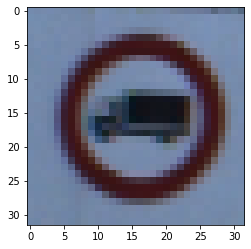

In [71]:
plt.imshow(test_data_x[0])

In [72]:
t = classNames[test_data_y[0]]
t

'Vehicles over 3.5 metric tons prohibited'